In [70]:
# open file with pandas 
import pandas as pd 




In [15]:
mag_seven_files = ['FB.csv', 'MSFT.csv', 'AMZN.csv', 'GOOG.csv', 'TSLA.csv','AAPL.csv']

dfs = [pd.read_csv('full_history/'+filename).rename(columns={'close':filename[:len(filename)-4]})[['date', filename[:len(filename)-4]]] for filename in mag_seven_files]

#print(dfs[1:])
#dfs[0].join(dfs[1:],on='date' ,how='inner', )
#dfs[0].head(10)


# make shift way of doing inner join of all dataframes
res = None
temp = dfs[0]
for i in range(0, len(dfs)-1):
    temp = pd.merge(temp, dfs[i+1], on='date', how='inner')
    res = temp

matrix = res.drop(columns=['date'])
corrMatrix = matrix.corr()



Text(0.5, 1.0, 'Magnificient 6 Correlation Matrix')

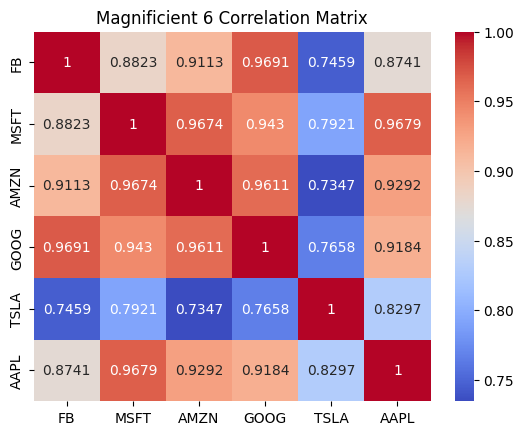

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(corrMatrix, cmap='coolwarm', annot=True, fmt='.4g')
plt.title("Magnificient 6 Correlation Matrix")

In [29]:
corrMatrix.to_csv('Mag6CorrelationMatrix.csv')

Text(0.5, 1.0, 'FB vs GOOG')

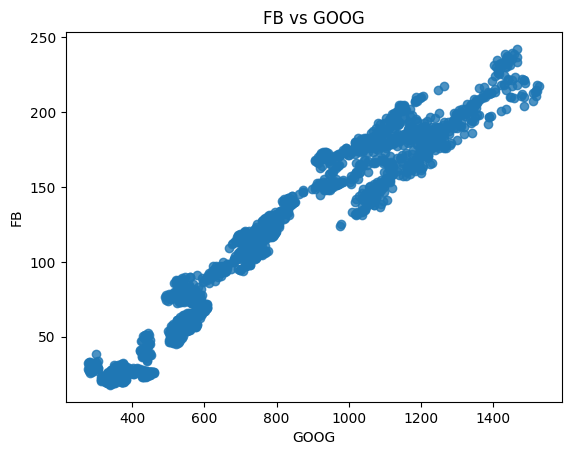

In [32]:
sns.regplot(x="GOOG", y="FB", data=matrix[['GOOG', 'FB']], fit_reg=False)
plt.title('FB vs GOOG')

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [38]:
goog_fb_dataframe = matrix[['GOOG', 'FB']]
goog_fb_dataframe.head(10)

,GOOG,FB
0,1464.699951,233.419998
1,1438.040039,237.550003
2,1413.609985,227.070007
3,1394.969971,220.639999
4,1359.900024,216.080002
5,1441.329956,235.679993
6,1431.969971,234.020004
7,1464.410034,242.240005
8,1451.859985,239.220001
9,1431.719971,238.789993


Text(0.5, 1.0, 'GOOG vs FB Rescaled')

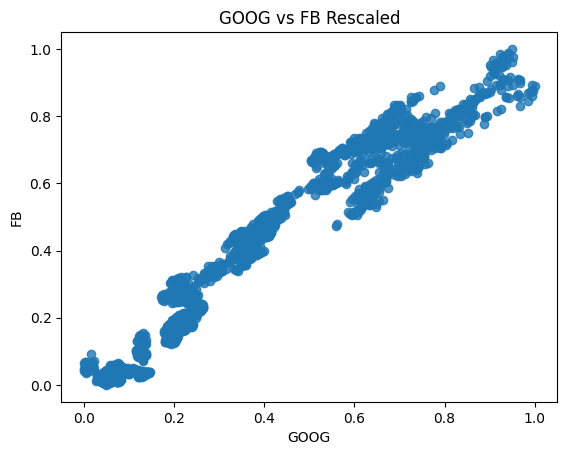

In [42]:
# rescale data
scaler = MinMaxScaler()
column_names = goog_fb_dataframe.columns
goog_fb_dataframe = scaler.fit_transform(goog_fb_dataframe)

# rename columns since it is now a numpy array
goog_fb_dataframe = pd.DataFrame(goog_fb_dataframe)
goog_fb_dataframe.columns = column_names
goog_fb_dataframe.head(10)

sns.regplot(x="GOOG", y="FB", data=goog_fb_dataframe, fit_reg=False)
plt.title('GOOG vs FB Rescaled')


In [77]:

linear_model = LinearRegression()
folds = KFold(n_splits=100, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(goog_fb_dataframe['GOOG'].values.reshape(-1, 1), goog_fb_dataframe['FB'].values.reshape(-1, 1), train_size=0.7, test_size=0.3)
linear_model.fit(X_train, y_train)
scores = cross_val_score(linear_model, goog_fb_dataframe['GOOG'].values.reshape(-1, 1), goog_fb_dataframe['FB'].values.reshape(-1, 1), scoring='r2', cv=folds)


In [78]:
import numpy as np
print(f"R squared score of linear model: {np.mean(scores)}")
print(f"Slope Estimate: {linear_model.coef_[0][0]}")
print(f"Intercept Estimate: {linear_model.intercept_[0]}")


R squared score of linear model: 0.9334982086861008
Slope Estimate: 1.019286618053484
Intercept Estimate: 0.012705909175006969
